# Importing library

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Importing dataset

In [4]:
from sklearn import datasets
iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['flower'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),flower
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [5]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], 
      dtype='<U10')

# Exploring the dataset

In [6]:
df.groupby(['flower']).mean()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
flower,,,,
0,5.006,3.418,1.464,0.244
1,5.936,2.770,4.260,1.326
2,6.588,2.974,5.552,2.026


## Features plot for different flowers.

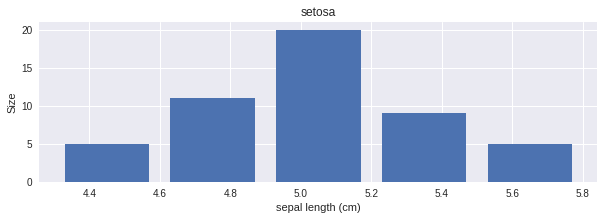

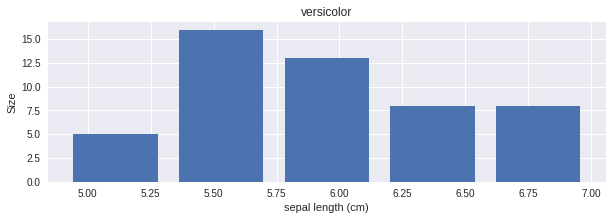

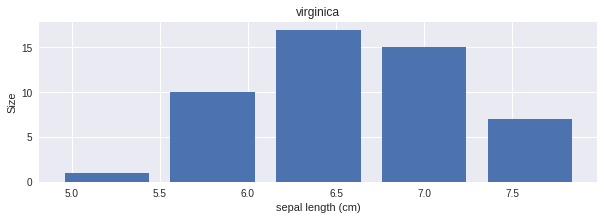

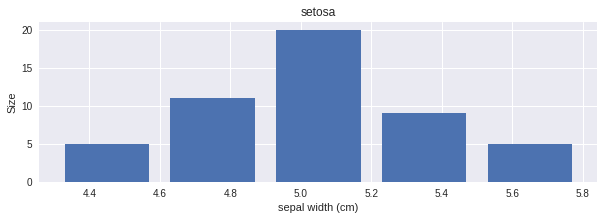

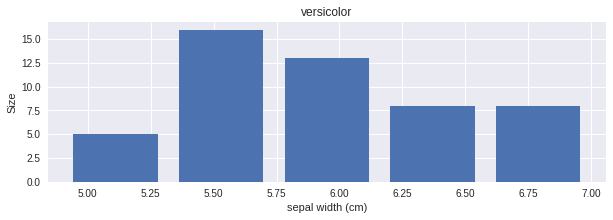

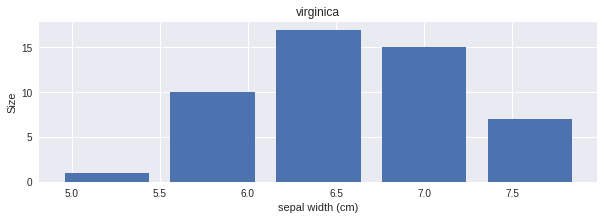

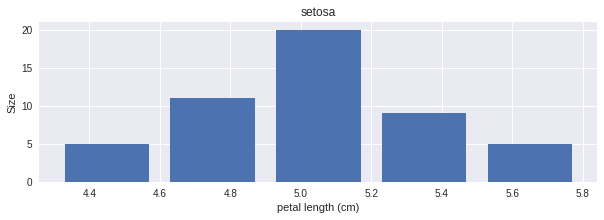

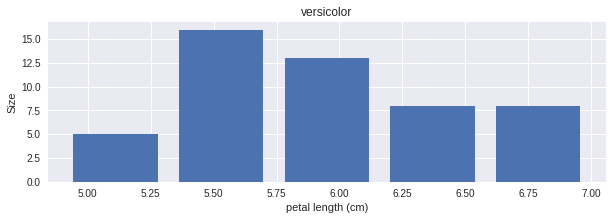

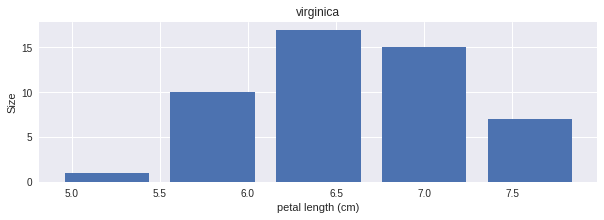

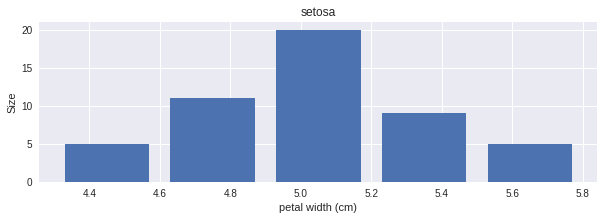

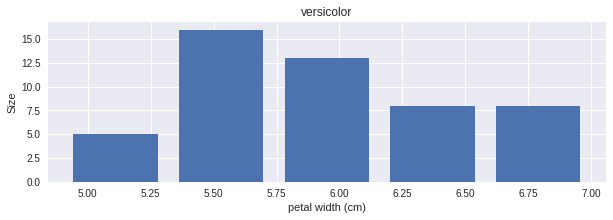

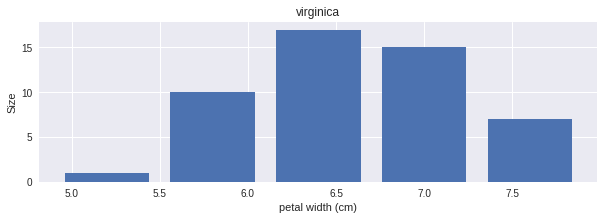

In [49]:
for i, feature in enumerate(iris.feature_names):
    plt.figure(i + 1)
    for j, flower in enumerate(iris.target_names):
        plt.figure(figsize=(10, 10))
        plt.subplot(310 + j + 1)
        plt.hist(df[df['flower'] == j]['sepal length (cm)'], rwidth=0.8, bins=5)
        plt.title(flower)
        plt.xlabel(feature)
        plt.ylabel('Size')
plt.show()

## Correlation map

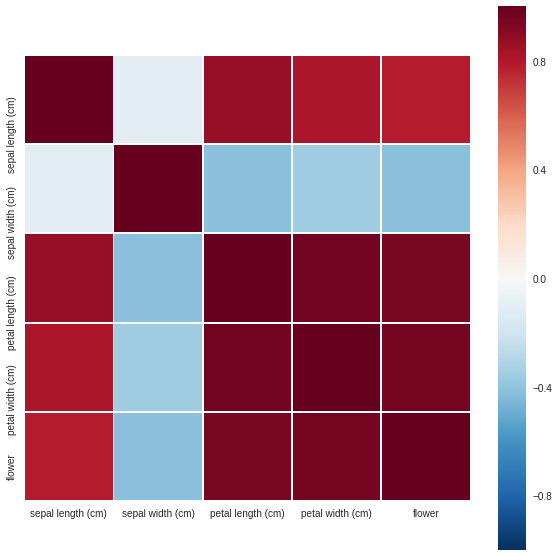

In [8]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), linewidths=0.8, square=True)

# Training and testing

In [9]:
X = df.drop(['flower'], axis=1)
y = df['flower']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)


## Logitic Regression

In [10]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf = clf.fit(X_train, y_train)

In [11]:
print("Train score:", clf.score(X_train, y_train))
print("Test score:", clf.score(X_test, y_test))

Train score: 0.961904761905
Test score: 0.911111111111


Logistic Regression performs well.

## Naive Bayes

In [43]:
from sklearn.naive_bayes import GaussianNB

clf = GaussianNB()
clf = clf.fit(X_train, y_train)

In [44]:
print("Train score:", clf.score(X_train, y_train))
print("Test score:", clf.score(X_test, y_test))

Train score: 0.961904761905
Test score: 0.955555555556


Clearly Naive Bayes performs decently well, perhaps due to features following gaussian distribution.

## Decision Tree Classifier

In [14]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

In [15]:
print("Train score:", clf.score(X_train, y_train))
print("Test score:", clf.score(X_test, y_test))

Train score: 1.0
Test score: 0.911111111111


Decision Tree Classifier performs well. Perhaps less number of features ensure it doesn't overfit.

## Random Forest

In [18]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
clf = clf.fit(X_train, y_train)

In [19]:
print("Train score:", clf.score(X_train, y_train))
print("Test score:", clf.score(X_test, y_test))

Train score: 0.980952380952
Test score: 0.955555555556


Random Forest performs well.

# Neural Network

In [29]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(hidden_layer_sizes=(3, 2))
clf = clf.fit(X_train, y_train)

/home/abhishek/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


In [30]:
print("Train score:", clf.score(X_train, y_train))
print("Test score:", clf.score(X_test, y_test))

Train score: 0.666666666667
Test score: 0.6


Neural Network performs poorly given small training size.

## SVM Classifier

In [40]:
from sklearn.svm import SVC

clf = SVC()
clf = clf.fit(X_train, y_train)

In [41]:
print("Train score:", clf.score(X_train, y_train))
print("Test score:", clf.score(X_test, y_test))


Train score: 0.990476190476
Test score: 1.0


SVM Classifier performs exceedingly well.

## Confusion Matrix

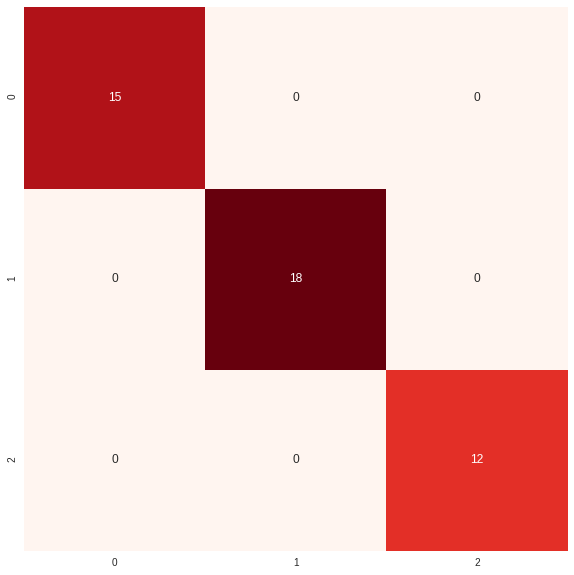

In [42]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(10, 10))
sns.heatmap(confusion_matrix(y_test, clf.predict(X_test)), annot=True, fmt="d", square=True, cbar=False, cmap='Reds')

# Conclusion

SVM Classifier performs exceedingly well. Random Forest,Naive Bayes and also perform well. Decison Tree Classifier and Logistic Regression follow. Neural Network badly underfits due to less training size. 